# **MODUL PRAKTIKUM MATAKULIAH DATA MINING**
*Oleh: Ryan Putranda Kristianto Dosen Prodi Ilmu Informatika UKDC Surabaya*

## Topik Material: *Exploratory Data Analysis*
Ini adalah bagian pertama dari modul praktikum ini, pembahasan akan berfokus seputar mengimport pustaka library yang dibutuhkan, meload dataset, menggunakan beberapa perintah untuk menampilkan data, melakukan univariate analysis dan multivariate analysis

# ***PART 1 - EDA***

In [1]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/dataset_damin.xlsx'
df = pd.read_excel(file_path)
df.head()

Mounted at /content/drive


,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat
0,1,hiperkolesterol,Rumah Sakit,Bandung,RS BORROMEUS,NaN,1172500.0
1,2,Hiperlipidemia,Laboratorium,Garut,NaN,NaN,454000.0
2,3,Hiperlipidemia,Poliklinik,Garut,KLINIK BHAKTI IP KOSAKA GARUT,NaN,59000.0
3,4,Vertigo,Poliklinik,Garut,KLINIK BHAKTI IP KOSAKA GARUT,NaN,80500.0
4,5,Check Up,Laboratorium,Garut,NaN,NaN,586000.0


In [4]:
df.head(10)

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat
0,1,hiperkolesterol,Rumah Sakit,Bandung,RS BORROMEUS,NaN,1172500.0
1,2,Hiperlipidemia,Laboratorium,Garut,NaN,NaN,454000.0
2,3,Hiperlipidemia,Poliklinik,Garut,KLINIK BHAKTI IP KOSAKA GARUT,NaN,59000.0
3,4,Vertigo,Poliklinik,Garut,KLINIK BHAKTI IP KOSAKA GARUT,NaN,80500.0
4,5,Check Up,Laboratorium,Garut,NaN,NaN,586000.0
5,6,Vertigo,Poliklinik,Garut,KLINIK BHAKTI IP KOSAKA GARUT,NaN,137860.0
6,7,PEMERIKSAAN,Rumah Sakit,Bandung,RS BORROMEUS,NaN,546900.0
7,8,Syaraf,Rumah Sakit,Bandung,RS BORROMEUS,Spesialis Saraf (Neurologi),1471700.0
8,9,Jantung,Rumah Sakit,Bandung,RS BORROMEUS,Spesialis Penyakit Dalam,2368800.0
9,10,Konsul Dokter,Rumah Sakit,Bandung,RS BORROMEUS,NaN,3217300.0


In [5]:
df.tail()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat
37756,37757,Periksa kandungan dan gatal kulit,Rumah Sakit,Sukabumi,RS Assyifa,Spesialis Obsgyn,393300.0
37757,37758,Gigi,Rumah Sakit,Sukabumi,RS Assyifa,Spesialis Gigi dan Mulut,466900.0
37758,37759,pemeriksaan kandungan - kehamilan,Rumah Sakit,Sukabumi,RS Assyifa,Spesialis Obsgyn,320000.0
37759,37760,gigi,Rumah Sakit,Sukabumi,RS Assyifa,Spesialis Gigi dan Mulut,964000.0
37760,37761,pemeriksaan kandungan - kehamilan,Rumah Sakit,Sukabumi,RS Assyifa,Spesialis Obsgyn,473125.0


In [6]:
df.dtypes


,0
no,int64
diagnosa,object
institusi,object
area,object
rumah,object
tipe,object
biaya_berobat,float64


# **UNIVARIATE ANALYSIS**
Menganalisis tiap masing - masing fitur secara individu

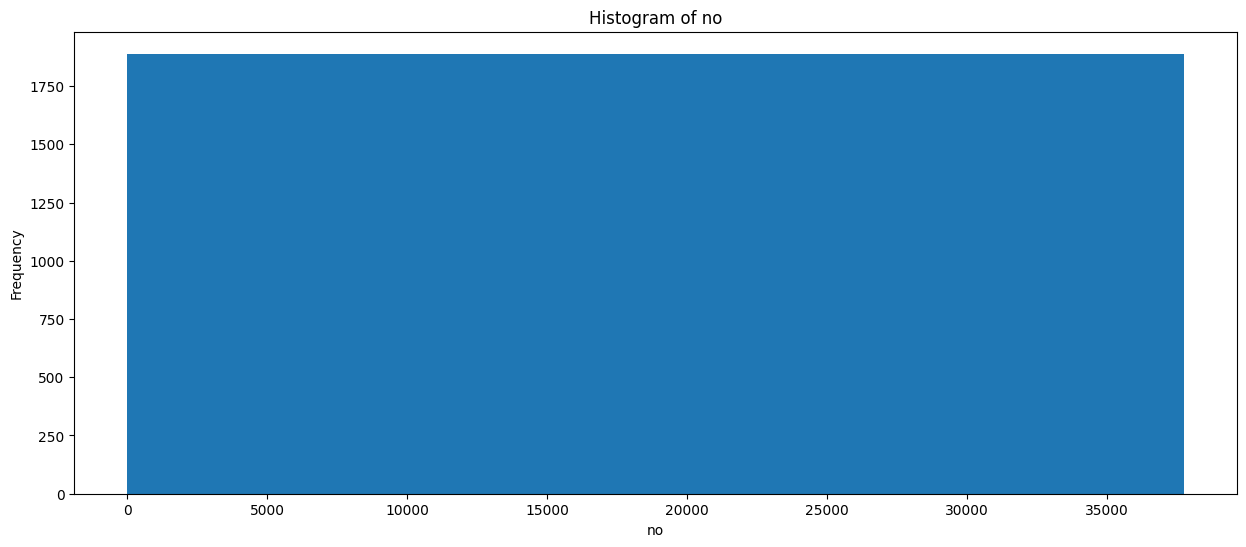

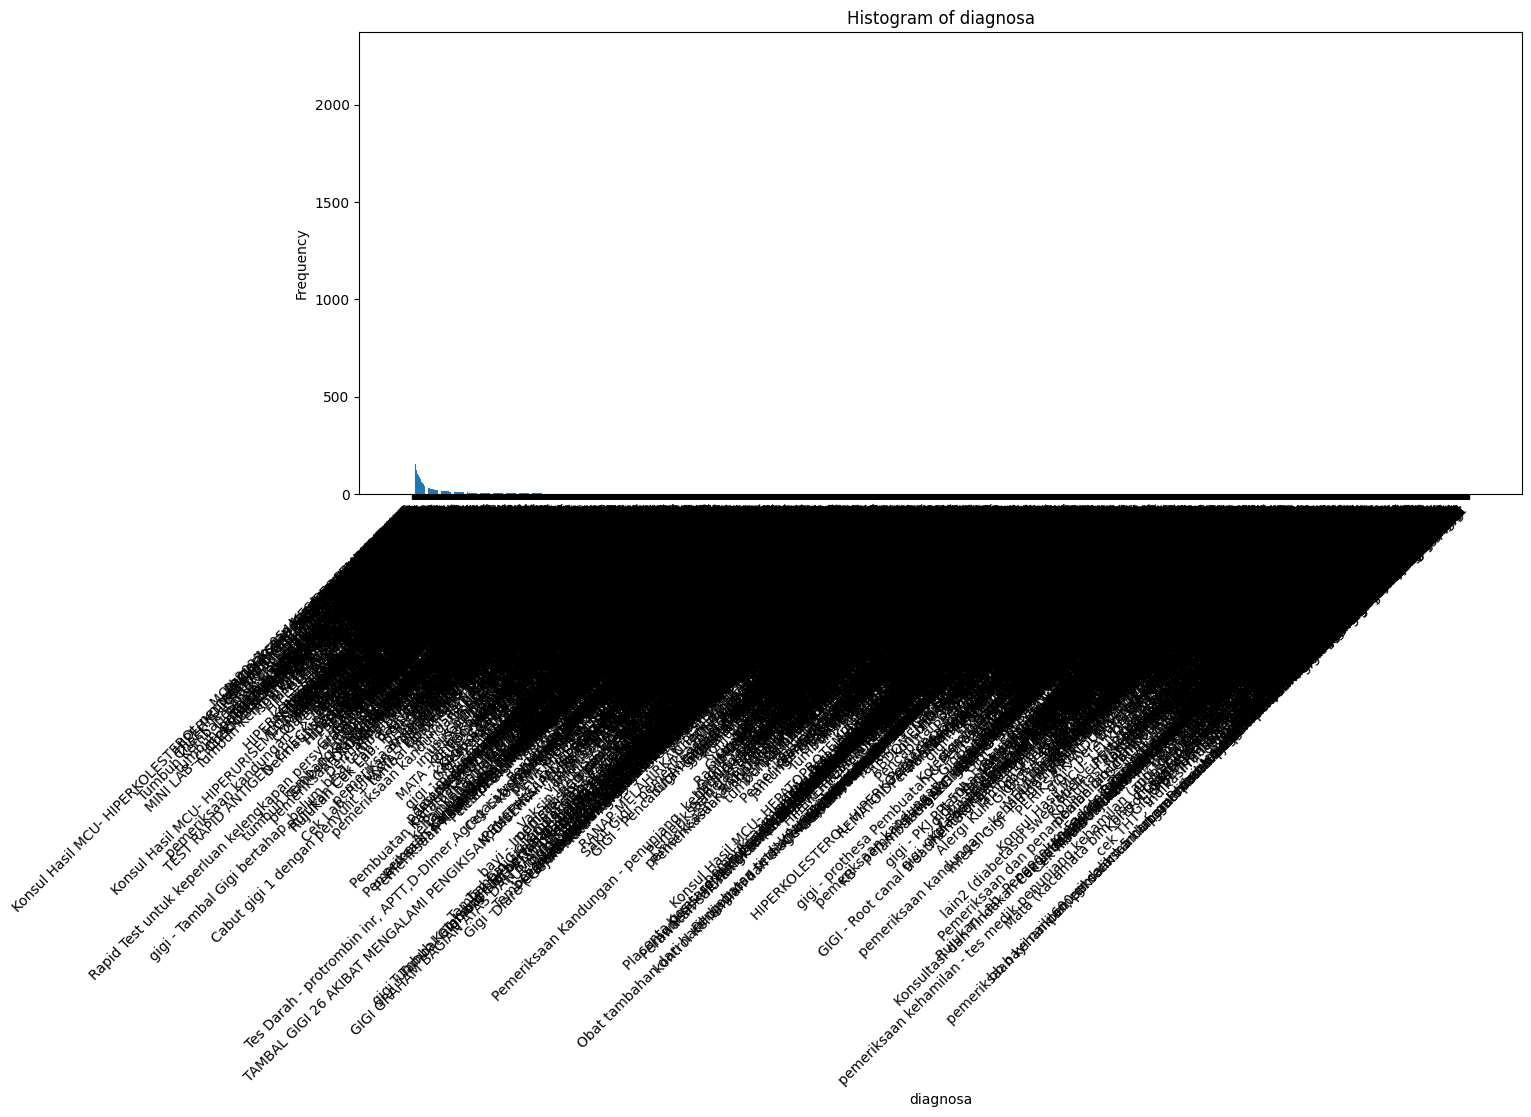

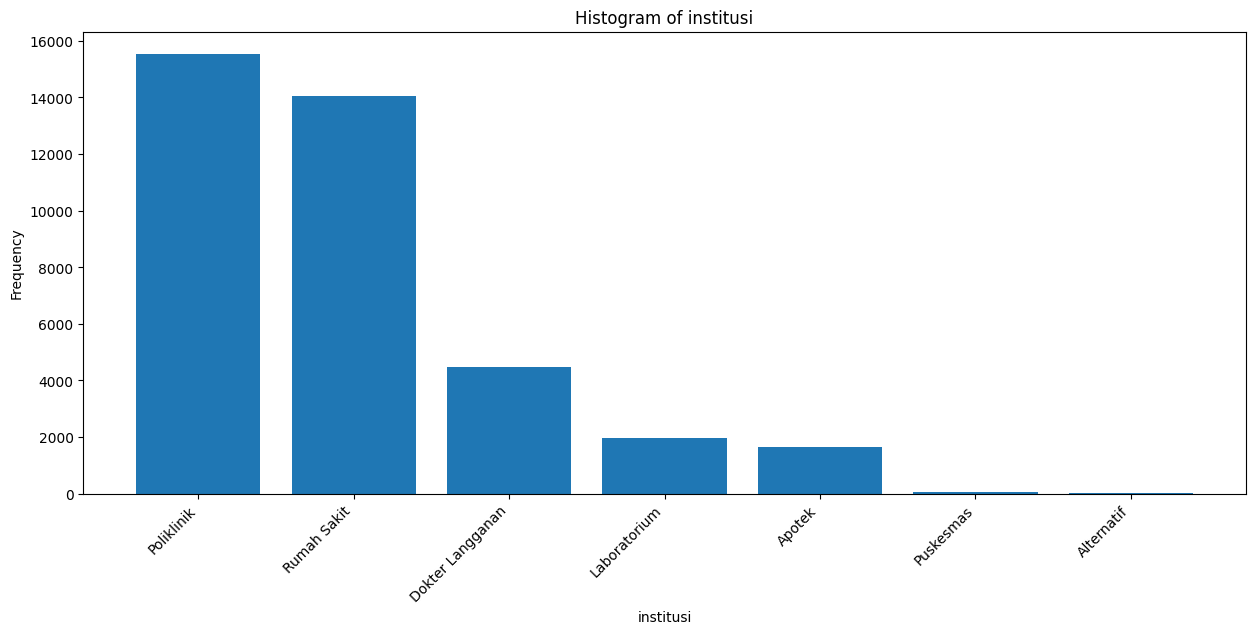

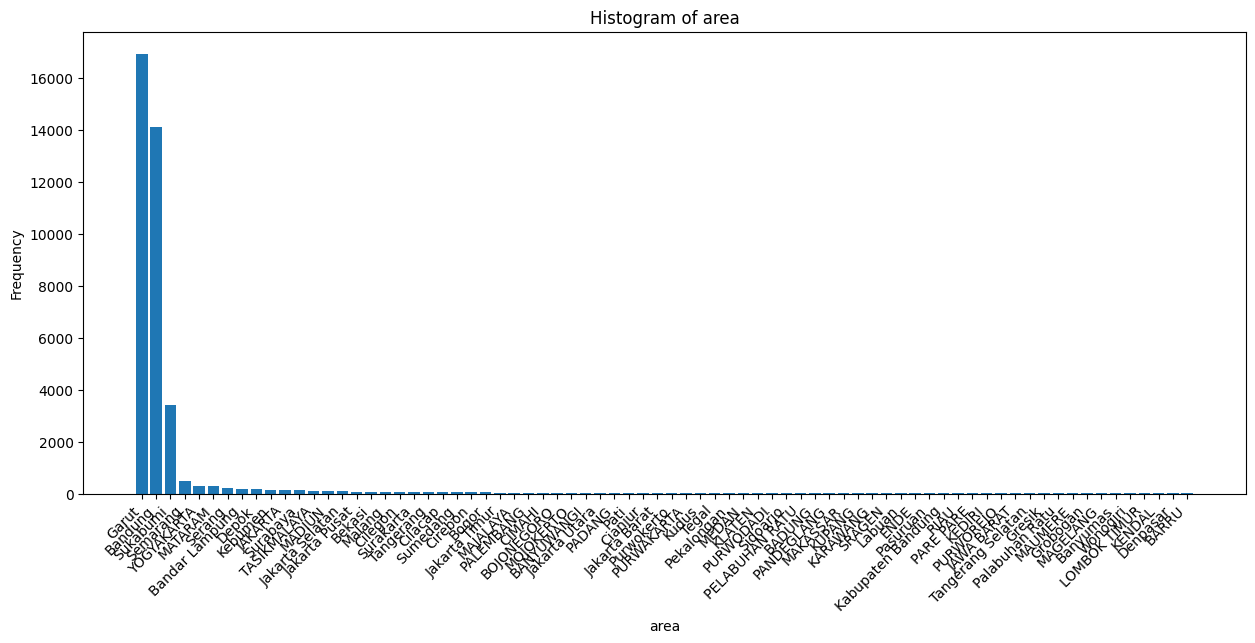

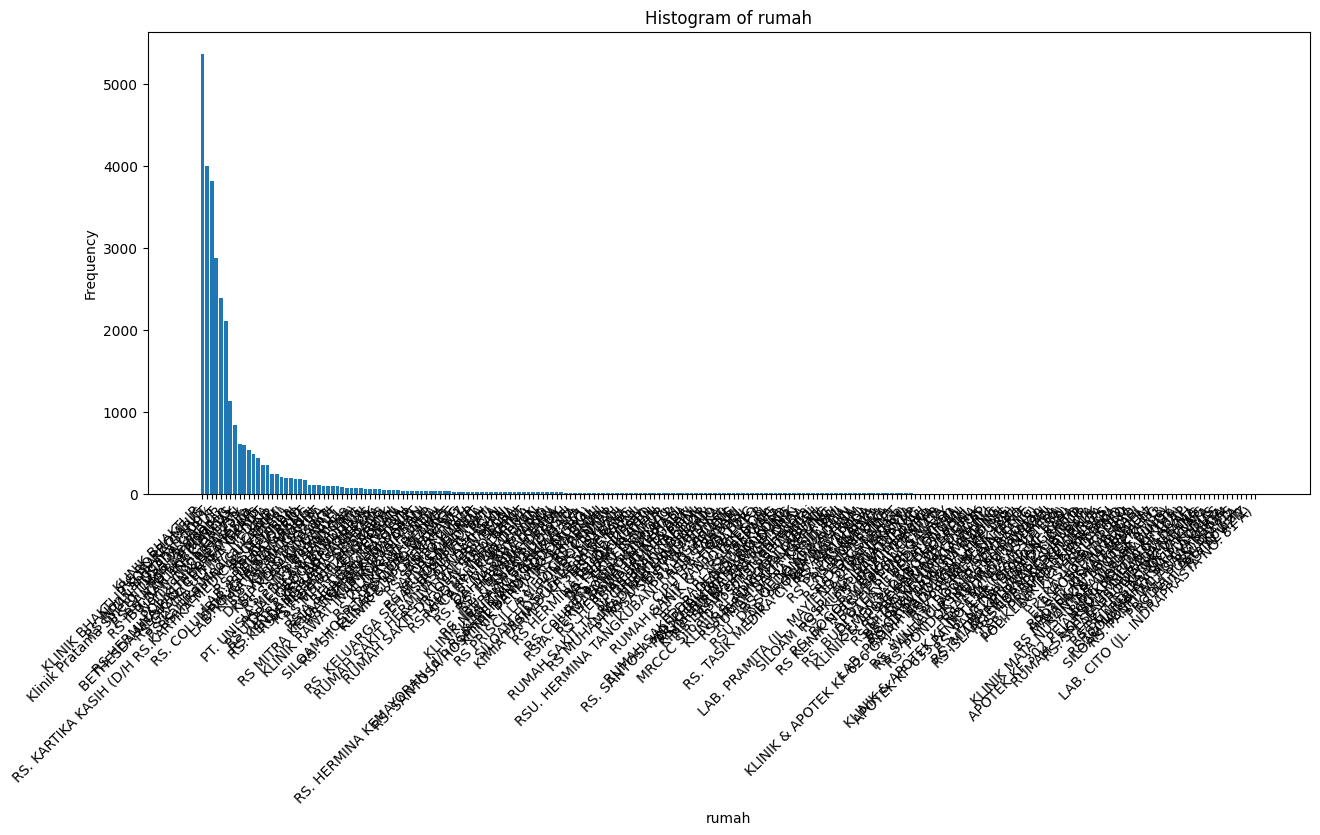

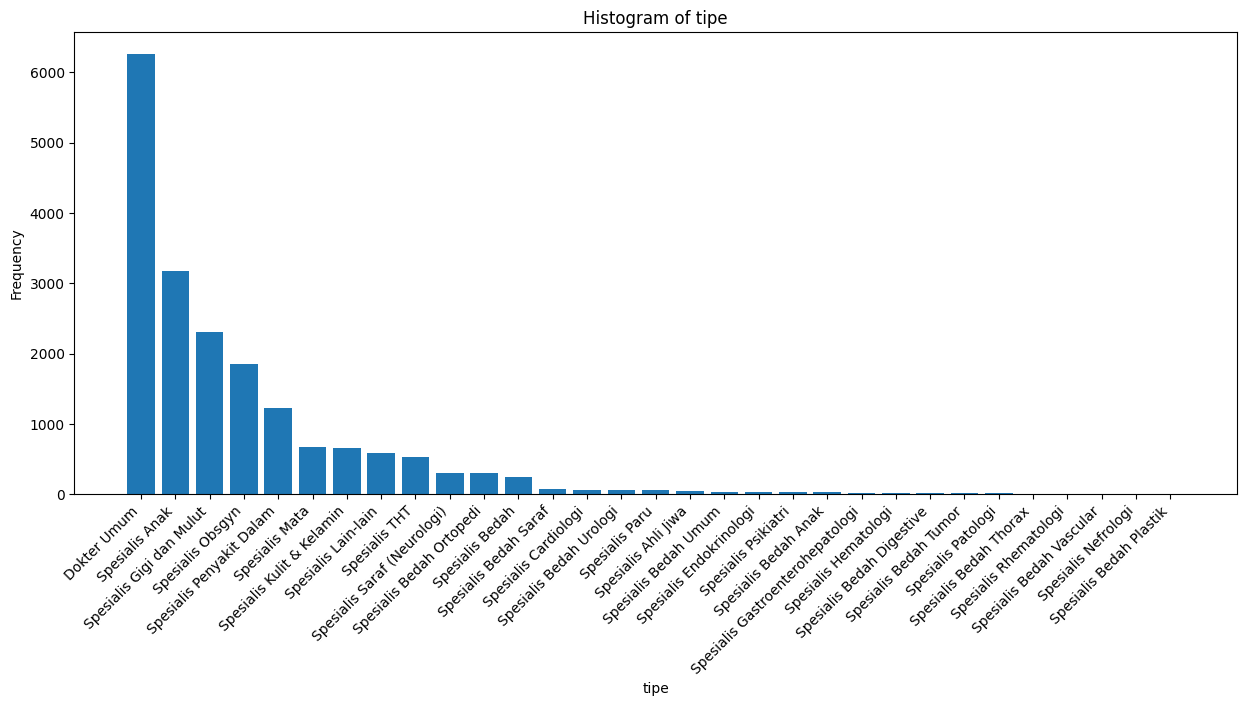

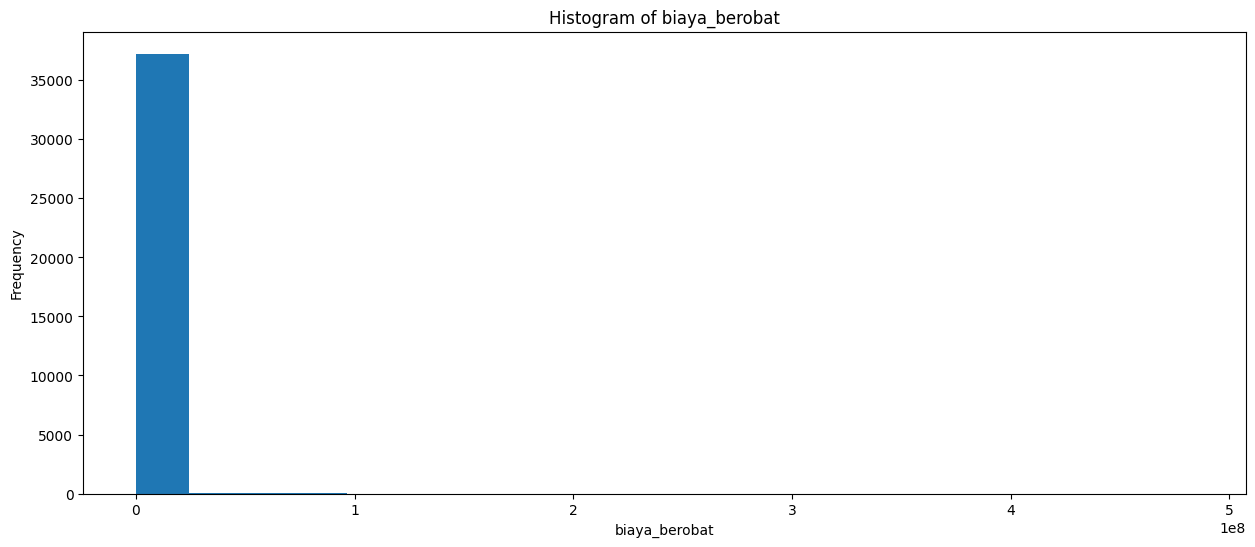

In [10]:
import matplotlib.pyplot as plt

for column in df.columns:
  plt.figure(figsize=(15, 6))  # Atur lebar dan panjang diagram

  # Check if the column contains numerical data
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.hist(df[column], bins=20)  # Create histogram for numerical data
  else:
    # Handle non-numerical data (e.g., categorical)
    value_counts = df[column].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()


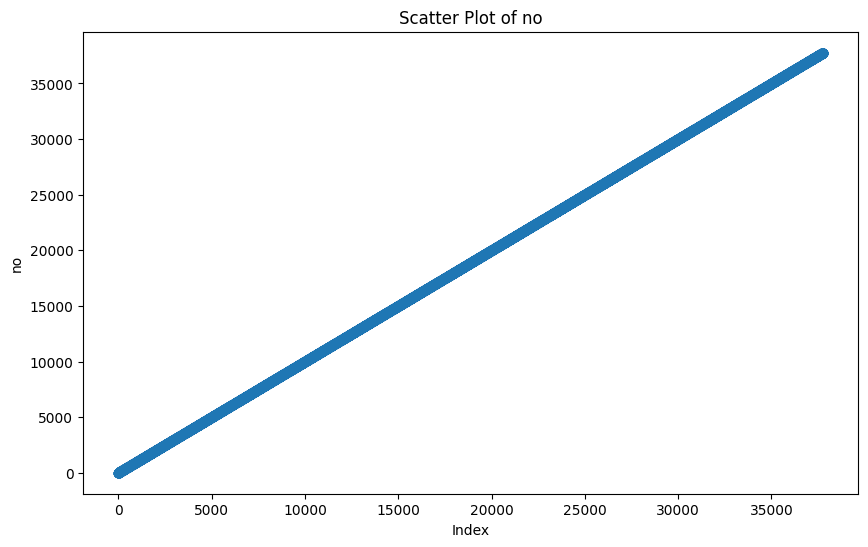

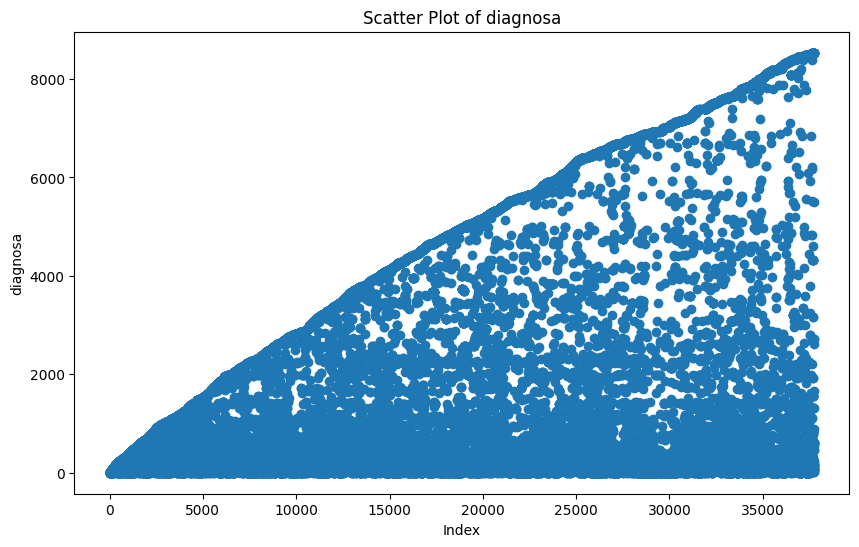

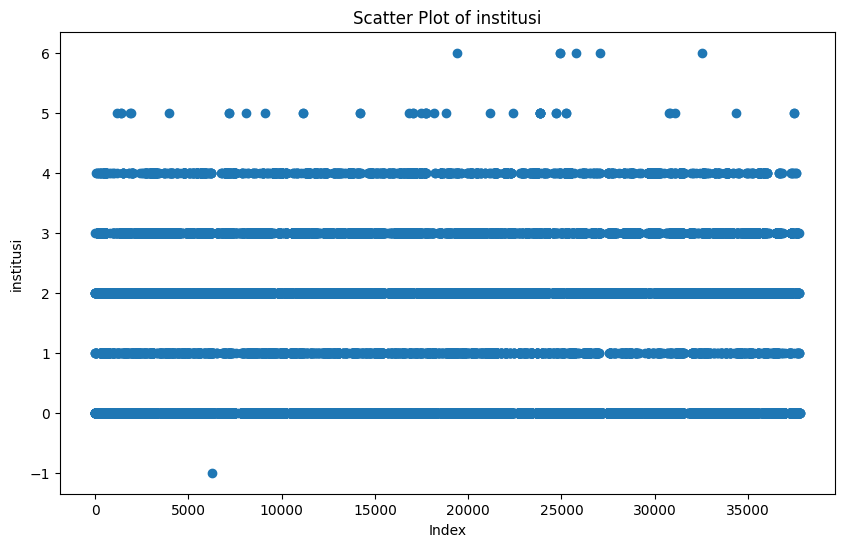

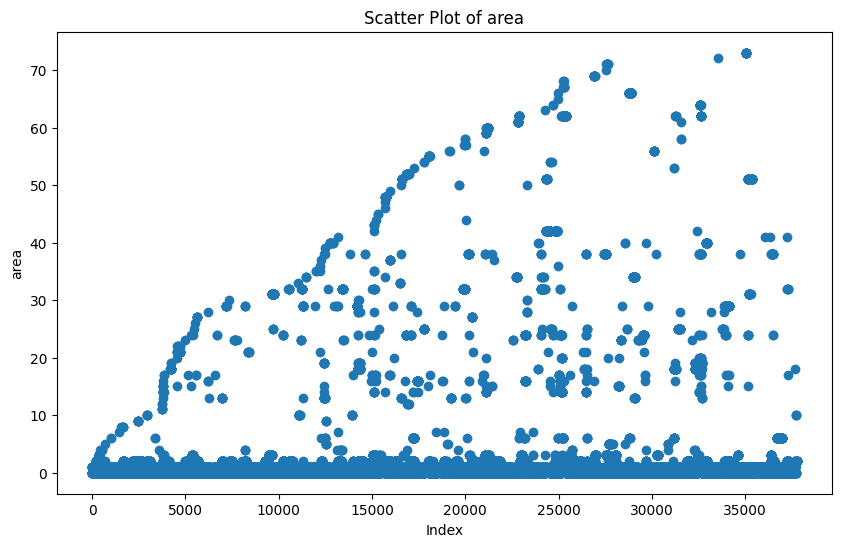

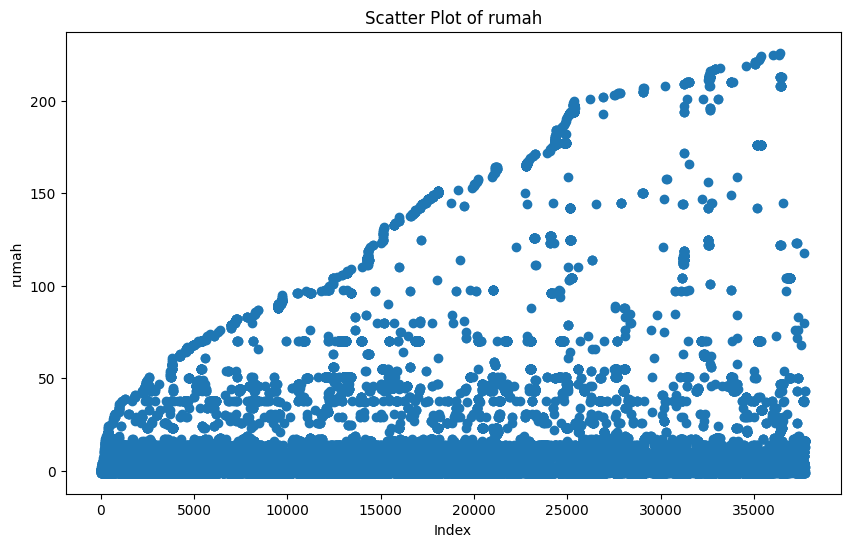

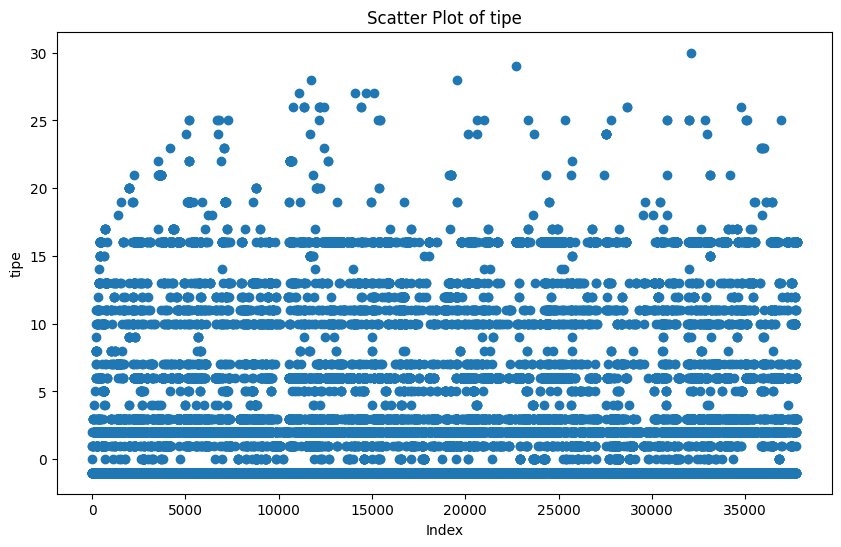

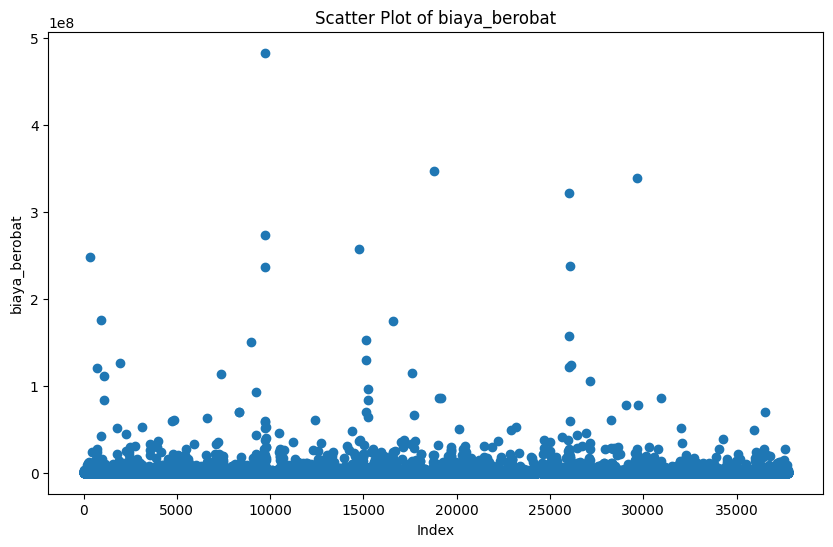

In [12]:
for column in df.columns:
  plt.figure(figsize=(10, 6))

  # Convert x-axis data to numerical representation if it's not already
  if not pd.api.types.is_numeric_dtype(df.index):
    x_data = pd.factorize(df.index)[0] # Convert to numerical categories
  else:
    x_data = df.index

  # Convert y-axis data to numerical if it's not already numerical
  if not pd.api.types.is_numeric_dtype(df[column]):
    y_data = pd.factorize(df[column])[0]
  else:
    y_data = df[column]

  plt.scatter(x_data, y_data)
  plt.title(f"Scatter Plot of {column}")
  plt.xlabel("Index")
  plt.ylabel(column)
  plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan dataset adalah df dan kolom 'diagnosa' adalah kategorik
dataolahencoding = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

# Label encoding untuk kolom 'diagnosa'
encoder = LabelEncoder()
dataolahencoding['diagnosa_encod'] = encoder.fit_transform(dataolahencoding['diagnosa'])
dataolahencoding['institusi_encod'] = encoder.fit_transform(dataolahencoding['institusi'])
dataolahencoding['area_encod'] = encoder.fit_transform(dataolahencoding['area'])
dataolahencoding['rumah_encod'] = encoder.fit_transform(dataolahencoding['rumah'])
dataolahencoding['tipe_encod'] = encoder.fit_transform(dataolahencoding['tipe'])
dataolahencoding['biaya_berobat_encod'] = encoder.fit_transform(dataolahencoding['biaya_berobat'])

In [14]:
dataolahencoding.head()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,hiperkolesterol,Rumah Sakit,Bandung,RS BORROMEUS,NaN,1172500.0,7073,6,5,67,31,14623
1,2,Hiperlipidemia,Laboratorium,Garut,NaN,NaN,454000.0,2061,3,17,227,31,9540
2,3,Hiperlipidemia,Poliklinik,Garut,KLINIK BHAKTI IP KOSAKA GARUT,NaN,59000.0,2061,4,17,31,31,221
3,4,Vertigo,Poliklinik,Garut,KLINIK BHAKTI IP KOSAKA GARUT,NaN,80500.0,6344,4,17,31,31,517
4,5,Check Up,Laboratorium,Garut,NaN,NaN,586000.0,612,3,17,227,31,11143


In [15]:
dataolahencoding = dataolahencoding.drop(['diagnosa', 'institusi', 'area', 'rumah', 'tipe', 'biaya_berobat'], axis=1)
dataolahencoding.head()


,no,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,7073,6,5,67,31,14623
1,2,2061,3,17,227,31,9540
2,3,2061,4,17,31,31,221
3,4,6344,4,17,31,31,517
4,5,612,3,17,227,31,11143


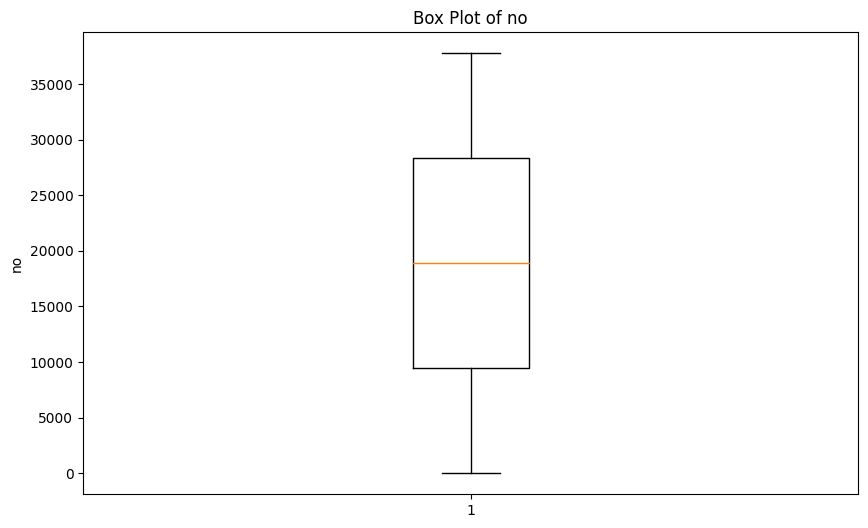

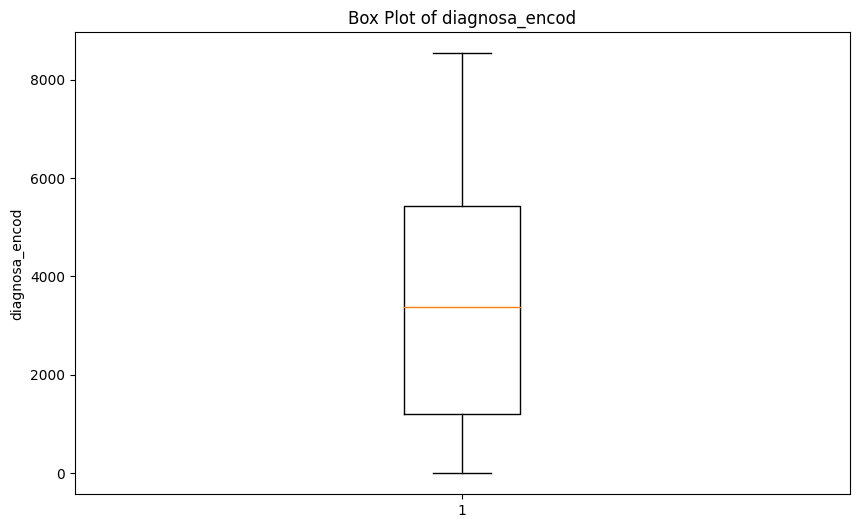

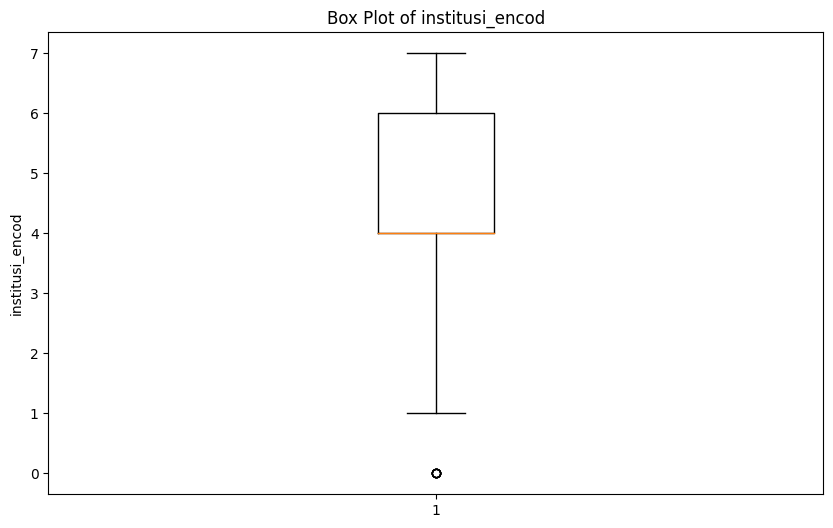

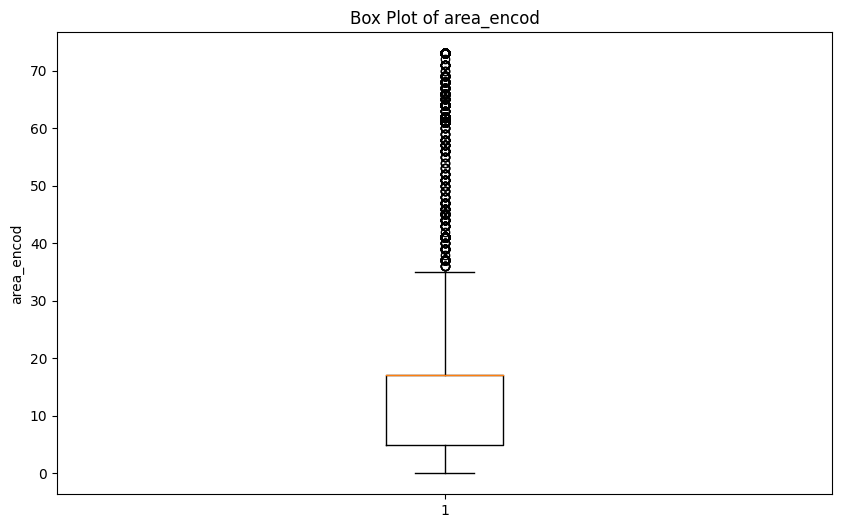

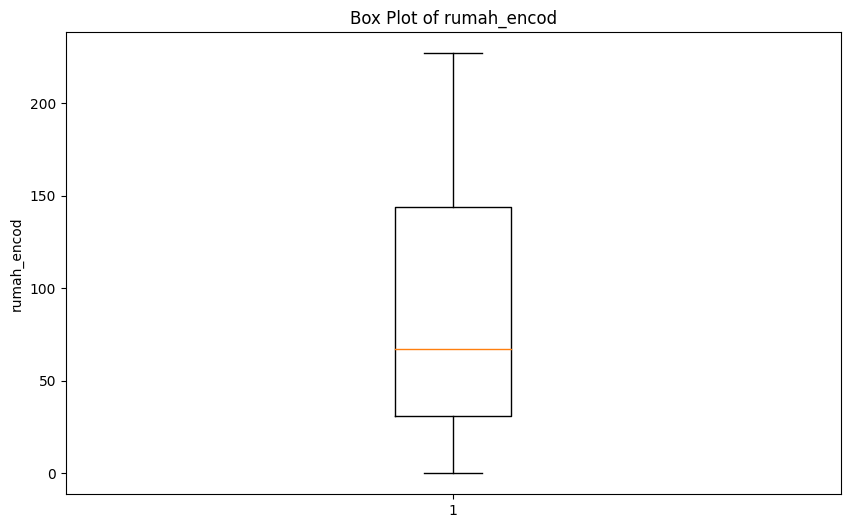

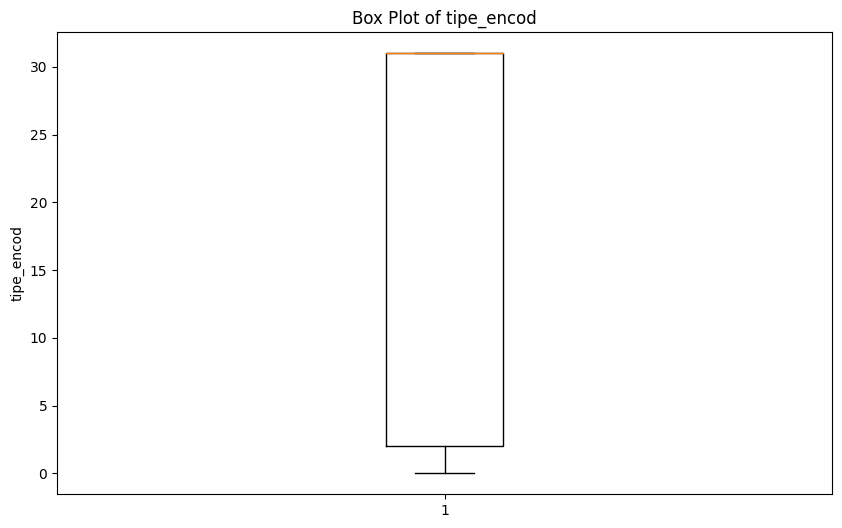

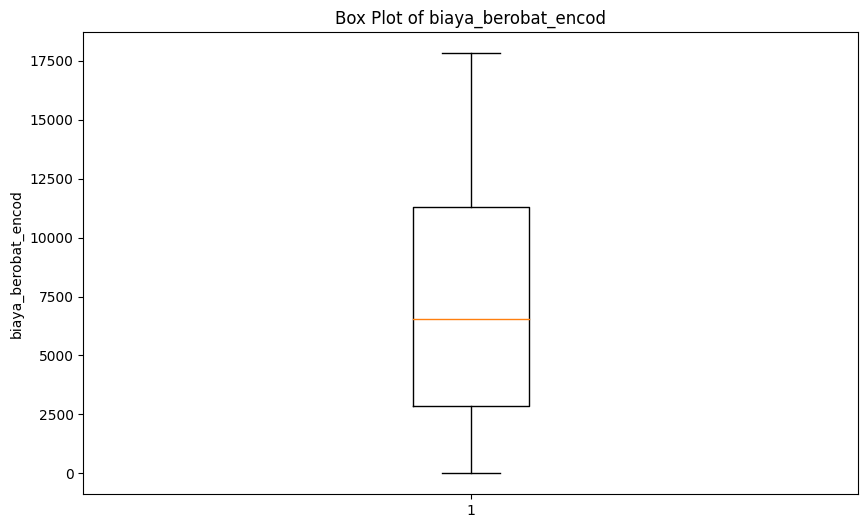

In [16]:
for column in dataolahencoding.columns:
  plt.figure(figsize=(10, 6))
  plt.boxplot(dataolahencoding[column])
  plt.title(f"Box Plot of {column}")
  plt.ylabel(column)
  plt.show()


In [17]:
import numpy as np

def find_outliers_iqr(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

for column in dataolahencoding.columns:
  outliers = find_outliers_iqr(dataolahencoding[column])
  if outliers:
    print(f"Kolom '{column}' memiliki outlier:")
    print(outliers)
    print()


Kolom 'institusi_encod' memiliki outlier:
[0, 0, 0, 0, 0, 0]

Kolom 'area_encod' memiliki outlier:
[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 61, 61, 61, 64, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 64, 64, 64, 65, 64, 73, 73, 48, 48, 48, 48, 48, 48, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 

# **MULTIVARIATE ANALYSIS**
Menganalisis keseluruhan fitur bersama - sama

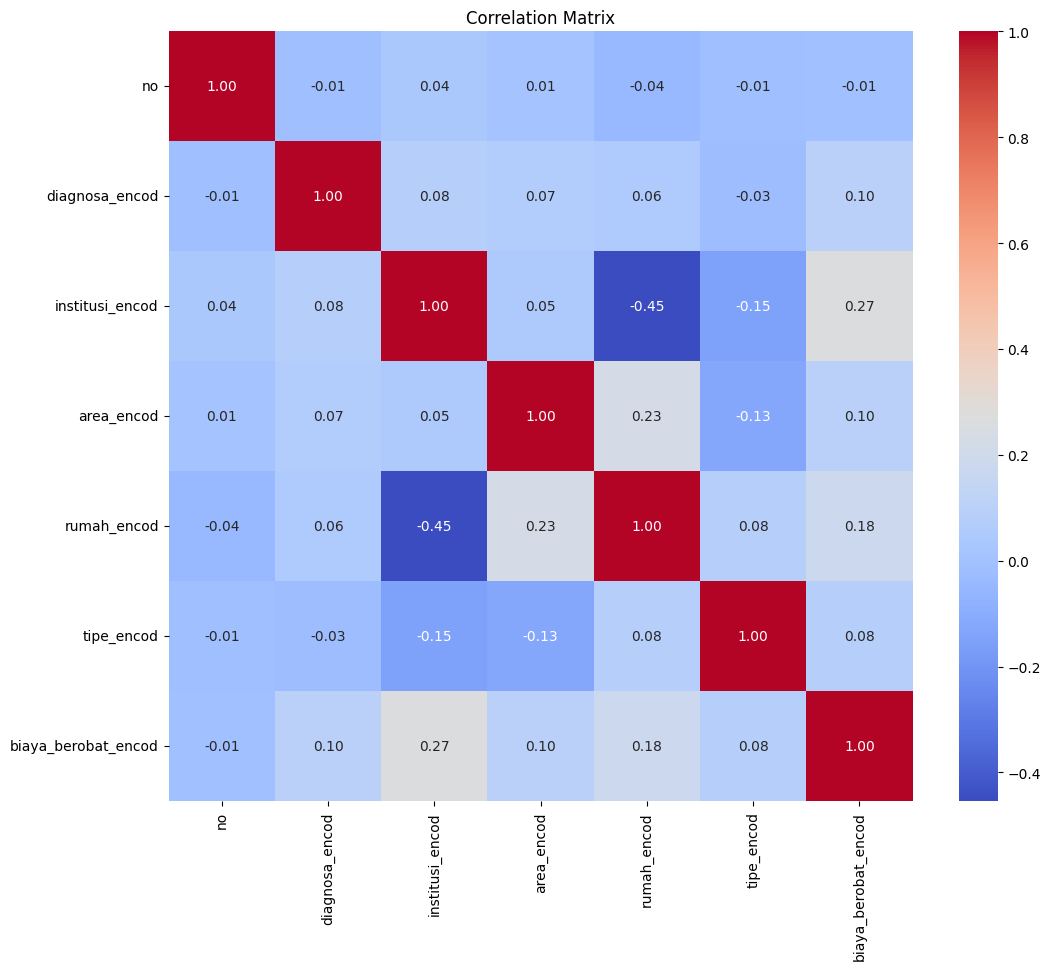

In [18]:
import seaborn as sns

correlation_matrix = dataolahencoding.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# **TUGAS**
Tambahkan analisis multivariate minimal 5, kemudian lakukan interpretasi dan analisis hasil yang didapatkan, deadline minggu depan


---



---



## Topik Material: *Unsupervised Learning: Reduksi dimensi dan Clustering K-Means*
Ini adalah bagian kedua dari modul praktikum ini, pembahasan akan berfokus seputar bagaimana teknik dan teori melakukan reduksi dimensi menggunakan PCA *(Principal Component Analysis)*, serta clustering menggunakan algoritma K-Means, kemudian menampilkan hasil visualisasi ScatterPlotnya

# ***PART 2 - UNSUPERVISED LEARNING***

In [19]:
dataolahencoding

,no,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,7073,6,5,67,31,14623
1,2,2061,3,17,227,31,9540
2,3,2061,4,17,31,31,221
3,4,6344,4,17,31,31,517
4,5,612,3,17,227,31,11143
...,...,...,...,...,...,...,...
37756,37757,4809,6,64,64,23,8625
37757,37758,1600,6,64,64,17,9725
37758,37759,7900,6,64,64,23,7451
37759,37760,6677,6,64,64,17,13825


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

       principal component 1  principal component 2
0              -18924.869055            7445.208711
1              -18883.750088            2079.044664
2              -18841.218807           -7224.468260
3              -18856.525561           -6679.170733
4              -18882.813555            3594.795567
...                      ...                    ...
37756           18865.144905            1500.962392
37757           18872.479792            2411.916302
37758           18861.552380             509.266031
37759           18838.463664            6800.997456
37760           18853.035273            2868.218874

[37761 rows x 2 columns]


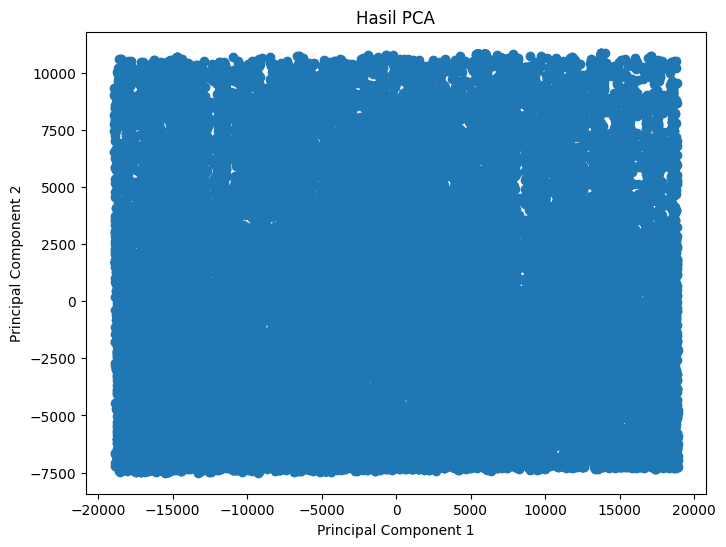

In [21]:
x = dataolahencoding
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(principalDf)

plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil PCA')
plt.show()

In [22]:
print(dataolahencoding)

          no  diagnosa_encod  institusi_encod  area_encod  rumah_encod  \
0          1            7073                6           5           67   
1          2            2061                3          17          227   
2          3            2061                4          17           31   
3          4            6344                4          17           31   
4          5             612                3          17          227   
...      ...             ...              ...         ...          ...   
37756  37757            4809                6          64           64   
37757  37758            1600                6          64           64   
37758  37759            7900                6          64           64   
37759  37760            6677                6          64           64   
37760  37761            7900                6          64           64   

       tipe_encod  biaya_berobat_encod  
0              31                14623  
1              31            

In [23]:
print(principalDf)

       principal component 1  principal component 2
0              -18924.869055            7445.208711
1              -18883.750088            2079.044664
2              -18841.218807           -7224.468260
3              -18856.525561           -6679.170733
4              -18882.813555            3594.795567
...                      ...                    ...
37756           18865.144905            1500.962392
37757           18872.479792            2411.916302
37758           18861.552380             509.266031
37759           18838.463664            6800.997456
37760           18853.035273            2868.218874

[37761 rows x 2 columns]


In [24]:
from sklearn.cluster import KMeans

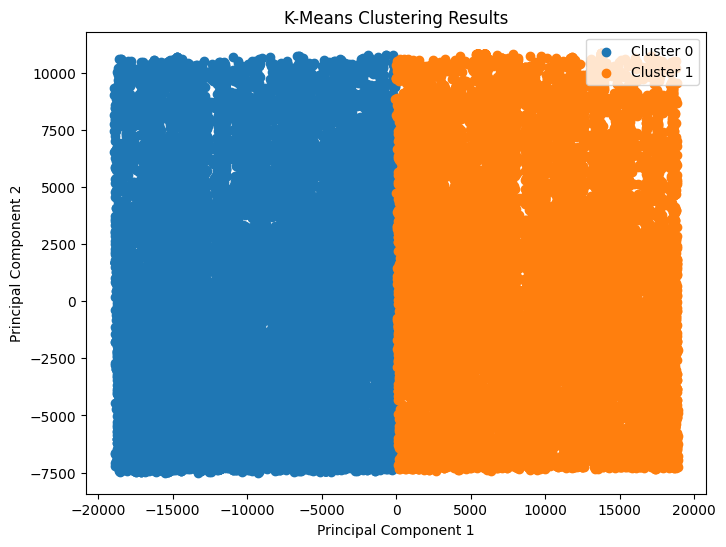

In [25]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

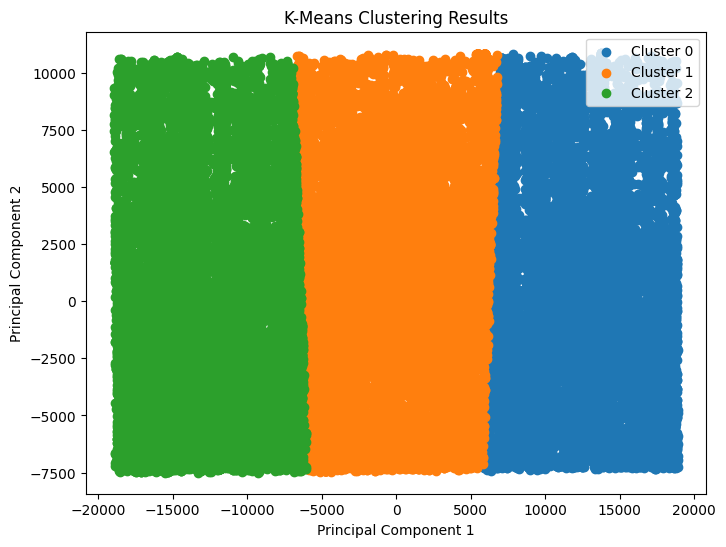

In [26]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

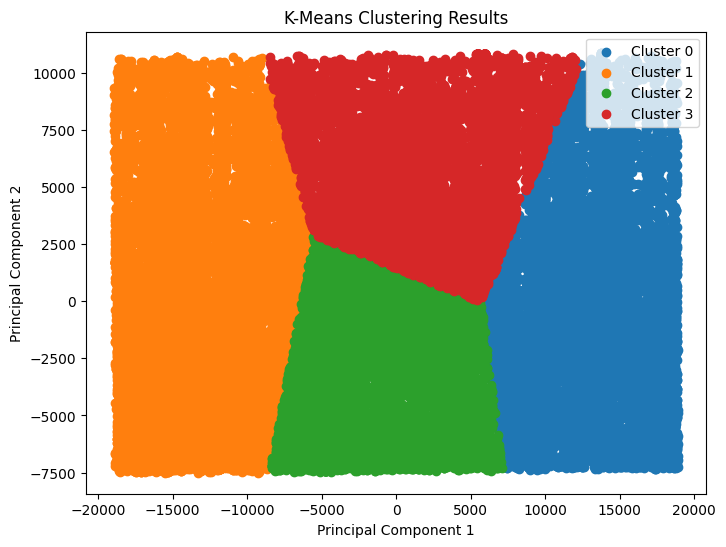

In [27]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()